In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
main_df = pd.read_csv("data/sales_data_analysis/Sales Data.csv")

In [3]:
main_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185950 entries, 0 to 185949
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        185950 non-null  int64  
 1   Order ID          185950 non-null  int64  
 2   Product           185950 non-null  object 
 3   Quantity Ordered  185950 non-null  int64  
 4   Price Each        185950 non-null  float64
 5   Order Date        185950 non-null  object 
 6   Purchase Address  185950 non-null  object 
 7   Month             185950 non-null  int64  
 8   Sales             185950 non-null  float64
 9   City              185950 non-null  object 
 10  Hour              185950 non-null  int64  
dtypes: float64(2), int64(5), object(4)
memory usage: 15.6+ MB


In [4]:
main_df.head()

,Unnamed: 0,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour
0,0,295665,Macbook Pro Laptop,1,1700.00,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",12,1700.00,New York City,0
1,1,295666,LG Washing Machine,1,600.00,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",12,600.00,New York City,7
2,2,295667,USB-C Charging Cable,1,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",12,11.95,New York City,18
3,3,295668,27in FHD Monitor,1,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",12,149.99,San Francisco,15
4,4,295669,USB-C Charging Cable,1,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",12,11.95,Atlanta,12


In [5]:
main_df.value_counts()

Unnamed: 0  Order ID  Product                     Quantity Ordered  Price Each  Order Date           Purchase Address                        Month  Sales    City           Hour
25116       319670    Bose SoundSport Headphones  1                 99.99       2019-12-21 21:45:00  747 Chestnut St, Los Angeles, CA 90001  12     99.99    Los Angeles    21      1
0           141234    iPhone                      1                 700.00      2019-01-22 21:25:00  944 Walnut St, Boston, MA 02215         1      700.00   Boston         21      1
            150502    iPhone                      1                 700.00      2019-02-18 01:35:00  866 Spruce St, Portland, ME 04101       2      700.00   Portland       1       1
            162009    iPhone                      1                 700.00      2019-03-28 20:59:00  942 Church St, Austin, TX 73301         3      700.00   Austin         20      1
            176558    USB-C Charging Cable        2                 11.95       2019-04-19 08:4

In [6]:
main_df['Quantity Ordered'].value_counts()

Quantity Ordered
1    168552
2     13324
3      2920
4       806
5       236
6        80
7        24
8         5
9         3
Name: count, dtype: int64

In [7]:
main_df['Price Each'].value_counts()

Price Each
11.95      21903
14.95      21658
2.99       20641
3.84       20577
11.99      18882
150.00     15549
99.99      13325
149.99      7507
700.00      6842
600.00      6837
389.99      6230
379.99      6181
300.00      4800
1700.00     4724
999.99      4128
109.99      4101
400.00      2065
Name: count, dtype: int64

In [8]:
main_df['Product'].value_counts()

Product
USB-C Charging Cable          21903
Lightning Charging Cable      21658
AAA Batteries (4-pack)        20641
AA Batteries (4-pack)         20577
Wired Headphones              18882
Apple Airpods Headphones      15549
Bose SoundSport Headphones    13325
27in FHD Monitor               7507
iPhone                         6842
27in 4K Gaming Monitor         6230
34in Ultrawide Monitor         6181
Google Phone                   5525
Flatscreen TV                  4800
Macbook Pro Laptop             4724
ThinkPad Laptop                4128
20in Monitor                   4101
Vareebadd Phone                2065
LG Washing Machine              666
LG Dryer                        646
Name: count, dtype: int64

In [9]:
main_df["Order Date"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 185950 entries, 0 to 185949
Series name: Order Date
Non-Null Count   Dtype 
--------------   ----- 
185950 non-null  object
dtypes: object(1)
memory usage: 1.4+ MB


In [10]:
main_df["Order Date"].describe()

count                  185950
unique                 142395
top       2019-12-15 20:16:00
freq                        8
Name: Order Date, dtype: object

In [11]:
main_df['Order Date'] = pd.to_datetime(main_df['Order Date'], errors='coerce')

# Drop any rows where 'Order Date' is NaT (conversion errors)
main_df.dropna(subset=['Order Date'], inplace=True)

# Group by month and count the number of occurrences
main_df['Month'] = main_df['Order Date'].dt.to_period('M')  # Converts to monthly periods
monthly_counts = main_df['Month'].value_counts().sort_index()

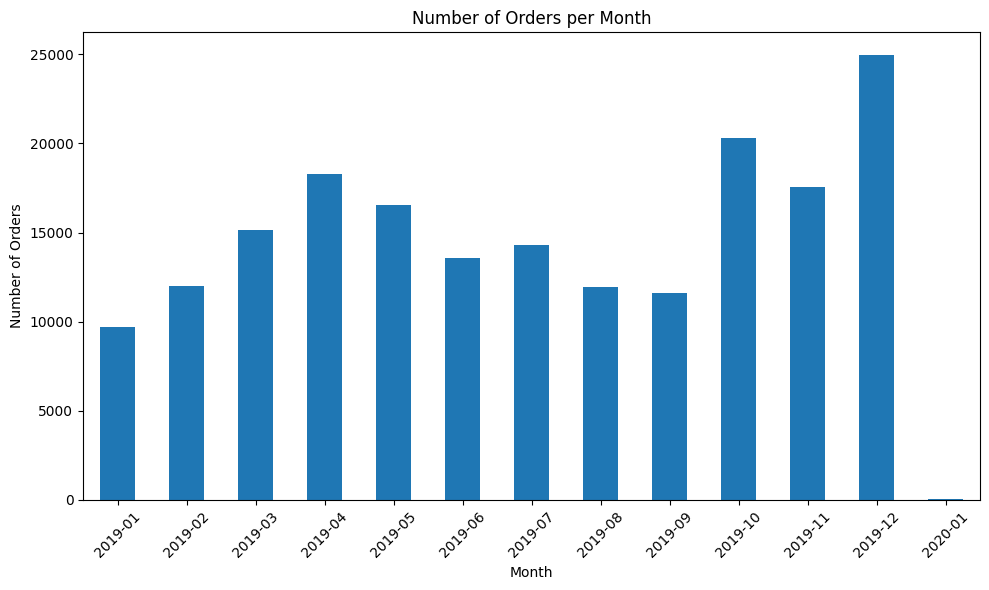

In [12]:
monthly_counts.plot(kind='bar', figsize=(10, 6))

plt.title('Number of Orders per Month')
plt.xlabel('Month')
plt.ylabel('Number of Orders')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()